In [1]:

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./data/ntsb_2008_2025.csv")

# ajustes df
df['ev_date'] = pd.to_datetime(df['ev_date'], format='%d/%m/%Y', errors='coerce')
df['ev_year'] = df['ev_date'].dt.year

cols = ['ev_type','acft_category','acft_make','DAMAGE',
        'flight_type','light_condition','wmc',
        'ev_highest_injury','ev_year']
df[cols] = df[cols].astype('category')
cols = ['pilot_flight_time_model', 'pilot_flight_time_total']
df[cols] = df[cols].astype(int)

C:\Users\tniet\AppData\Local\Temp\ipykernel_21516\4249411940.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha='right')
C:\Users\tniet\AppData\Local\Temp\ipykernel_21516\4249411940.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha='right')
C:\Users\tniet\AppData\Local\Temp\ipykernel_21516\4249411940.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha='right')
C:\Users\tniet\AppData\Local\Temp\ipykernel_21516\4249411940.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLoc

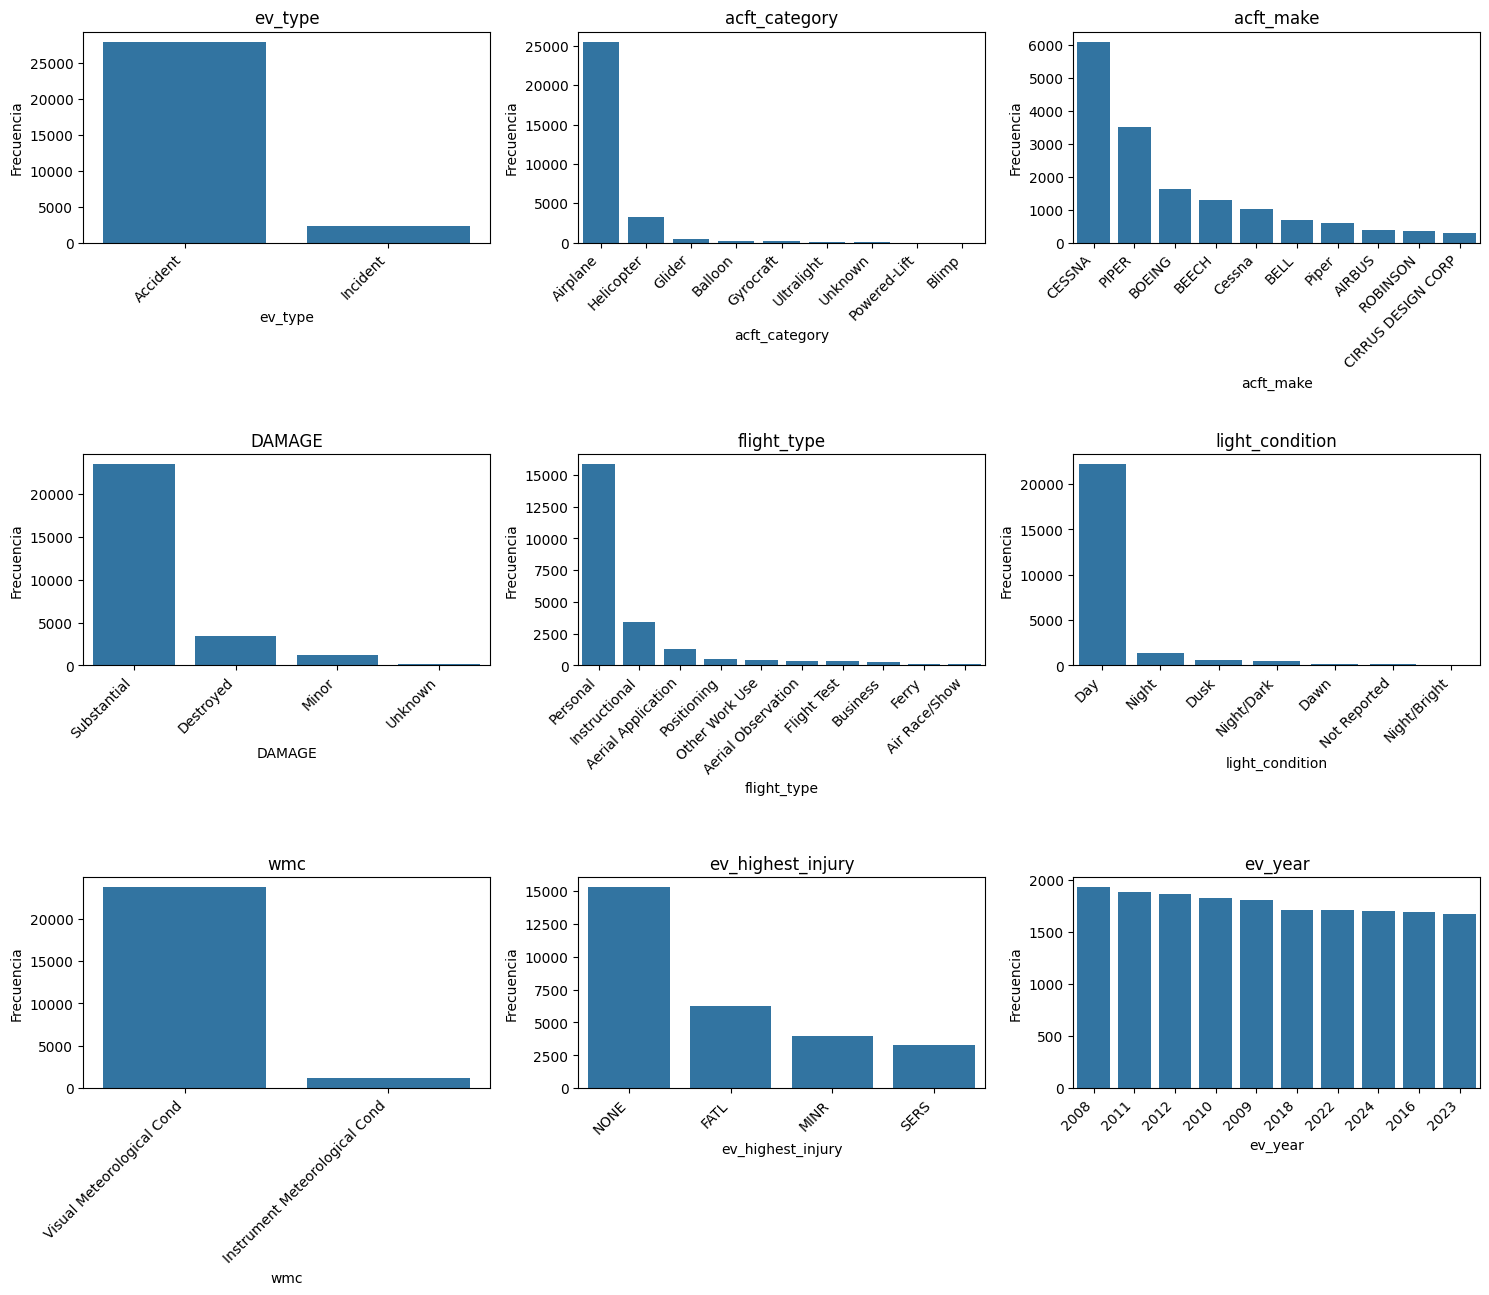

In [2]:
def plot_features(df, x, y, types, rotation=45):
    cols = df.select_dtypes(include=types).columns
    # n_plots = len(cols)
    
    fig, axes = plt.subplots(x, y, figsize=(5*y, 4*x))
    axes = axes.flatten()
    
    for i, var in enumerate(cols):
        ax = axes[i]
        if types[0] in ['category', 'object']:
            sns.countplot(x=var, data=df, ax=ax, order=df[var].value_counts().iloc[:10].index)
            ax.set_ylabel("Frecuencia")
            ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha='right')
        else:
            df[var].hist(bins=20, ax=ax)
            ax.set_ylabel("Cantidad")
        ax.set_title(var)
    
    
    for j in range(i+1, x*y):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

plot_features(df, 7, 3, ['category'], rotation=45)


In [3]:
from ydata_profiling import ProfileReport

# ajustes profiling
df.drop(columns=['ev_year'], inplace=True)
type_schema = {
    "acft_make": "Categorical",
    "pilot_flight_time_model": "Numeric",
    "pilot_flight_time_total": "Numeric"
}

profile = ProfileReport(df, title="NTSB Accident Data 2008-2025 — Profiling Report", type_schema=type_schema)
profile.to_file("./profiling/ntsb_2008_2025_dataset_p1.html")

c:\data\code\visualizdatos-pr\prp1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 19.23it/s]
